In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_squared_error


In [6]:
# Load the dataset
df = pd.read_csv('heart_disease_uci(1) (1).csv')
df.head()


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:

df['num'] = (df['num'] > 0).astype(int)

# Define X y y
X = df.drop(columns=['num'])
X = pd.get_dummies(X, drop_first=True)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score

# Pipeline: imputa y luego entrena
logreg_pipe = make_pipeline(
    SimpleImputer(strategy='median'),        # rellena NaN con la mediana
    LogisticRegression(
        penalty='l2',                        # regularización L2
        solver='lbfgs',                      # compatible con L2
        max_iter=1000
    )
)

logreg_pipe.fit(X_train, y_train)
y_pred  = logreg_pipe.predict(X_test)
y_proba = logreg_pipe.predict_proba(X_test)[:, 1]

print("Accuracy:",  accuracy_score(y_test, y_pred))
print("F1 score:",  f1_score(y_test, y_pred))
print("AUROC:",     roc_auc_score(y_test, y_proba))
print("AUPRC:",     average_precision_score(y_test, y_proba))



Accuracy: 0.8152173913043478
F1 score: 0.839622641509434
AUROC: 0.9061773700305812
AUPRC: 0.9269369312265675


/Users/sandragarcia/Documents/HUMBER/Clinical Bioinformatics/2nd Semester/Machine Learning/.pixi/envs/default/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# k-NN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

for k in [1, 5, 10]:
    knn_pipe = make_pipeline(
        SimpleImputer(strategy='median'),
        KNeighborsClassifier(n_neighbors=k)
    )
    knn_pipe.fit(X_train, y_train)
    y_pred = knn_pipe.predict(X_test)
    y_proba = knn_pipe.predict_proba(X_test)[:, 1]
    print(f'k = {k}')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('AUROC:', roc_auc_score(y_test, y_proba))
    print('AUPRC:', average_precision_score(y_test, y_proba))
    print('----------------------')


k = 1
Accuracy: 0.6413043478260869
F1 Score: 0.6796116504854369
AUROC: 0.6411009174311928
AUPRC: 0.6754011448356971
----------------------
k = 5
Accuracy: 0.6902173913043478
F1 Score: 0.7298578199052133
AUROC: 0.739388379204893
AUPRC: 0.7665817503501797
----------------------
k = 10
Accuracy: 0.717391304347826
F1 Score: 0.7346938775510204
AUROC: 0.794434250764526
AUPRC: 0.8190658724122633
----------------------


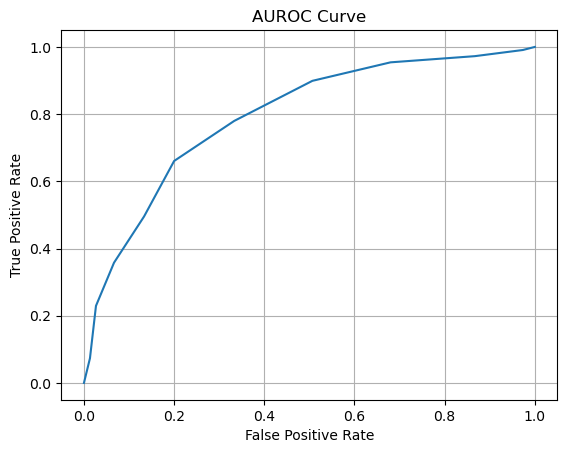

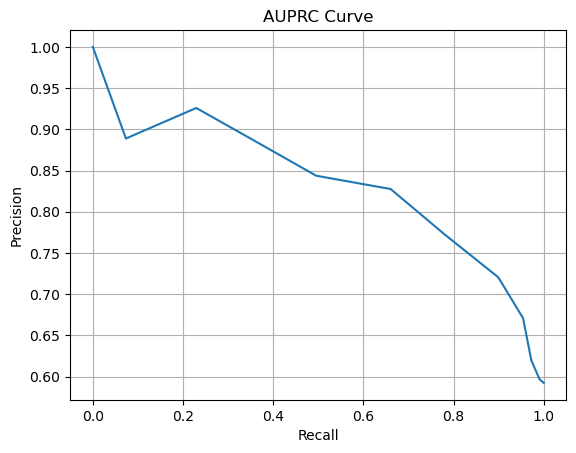

In [12]:
from sklearn.metrics import roc_curve, precision_recall_curve

# AUROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr)
plt.title('AUROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# AUPRC
prec, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, prec)
plt.title('AUPRC Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()
